# Da li znanje matematike ima veze sa znanjem programiranja

U fajlu "studenti.csv" je dataset sa podacima više studenata (svaki red je jedan student) i kolonama:
- Indeks (broj indeksa - anonimizirano)
- Ime, Prezime (anonimizirano)
- Pol
- Matematika 1 (broj poena na ispitu iz matematike)
- Principi programiranja (broj poena na ispitu iz programiranja)

Potrebno je utvrditi da li postoje neke grupe studenata kada se analiziraju ocene iz matematike i programiranja.
Subjektivne pretpostavke su da studenti koji znaju matematiku, znaju dobro i da programiraju. Ne uzimati u obzir
pol studenata pri klasterizaciji.

Probati sa hijerarhijskom klasterizacijom.

Kojem klasteru bi pripao student koji ima 50 poena iz matematike i 100 iz programiranja?

Napomene:
- Ovo je "idealan" primer, ali su podaci stvarni
- Nema nedostajućih podataka
- Nema outlier-a
- Radi se analiza samo prema dve promenljive (broj poena iz matematike i programiranja)
- Obe promenljive su u istom rasponu od 40 do 100

In [1]:
#Učitavanje pandas-a (rad sa dataframe-ovima), sklearn.cluster (klasterovanje KMeans) i matplotlib-a (grafici)
import pandas as pd
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
from sklearn.utils.estimator_checks import check_clustering

In [2]:
#Učitavanje podataka iz csv fajla u Pandas Data Frame
studenti = pd.read_csv("../data/studenti.csv")

#Pogledamo otprilike koji su podaci
studenti.head()

,Indeks,Ime,Prezime,Pol,Matematika 1,Principi programiranja
0,1,**,**,M,61,60
1,2,**,**,Z,84,93
2,3,**,**,M,79,93
3,4,**,**,M,42,44
4,5,**,**,M,43,41


In [3]:
#Pogledamo i detaljnije kog su tipa, kao i koje su deskriptivne statistike za numeričke podatke
studenti.info()
studenti.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Indeks                  100 non-null    int64 
 1   Ime                     100 non-null    object
 2   Prezime                 100 non-null    object
 3   Pol                     100 non-null    object
 4   Matematika 1            100 non-null    int64 
 5   Principi programiranja  100 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


,Indeks,Matematika 1,Principi programiranja
count,100.000000,100.000000,100.000000
mean,50.500000,62.840000,62.920000
std,29.011492,14.669228,15.970098
min,1.000000,41.000000,41.000000
25%,25.750000,50.500000,48.750000
50%,50.500000,62.000000,61.000000
75%,75.250000,76.000000,77.250000
max,100.000000,100.000000,95.000000


In [4]:
#Izbacivanje promenljivih tj. kolona "Indeks", "Pol" "Ime" i "Prezime" jer nisu potrebni u dataset-u
# Indeks, ime i prezime su opisni, a rečeno je da pol treba izuzeti iz klasterizacije.
#Ostaju samo numeričke promenljive po kojima će se vršiti klasterovanje
cluster_data = studenti.drop(columns = ["Indeks", "Pol", "Ime", "Prezime"])

In [5]:
#Proverimo podatke koji su ostali
cluster_data.describe()

# Ovde proverimo raspone promenljivih
# Raspon vrednosti je skoro isti za obe promenljive 41-95 odnosno 41-100

,Matematika 1,Principi programiranja
count,100.000000,100.000000
mean,62.840000,62.920000
std,14.669228,15.970098
min,41.000000,41.000000
25%,50.500000,48.750000
50%,62.000000,61.000000
75%,76.000000,77.250000
max,100.000000,95.000000


In [6]:
# Ovde proverimo NaN u svim kolonama (promenljivima)
# Nema NaN vrednosti ni u jednoj koloni
print(cluster_data.isnull().sum())

Matematika 1              0
Principi programiranja    0
dtype: int64


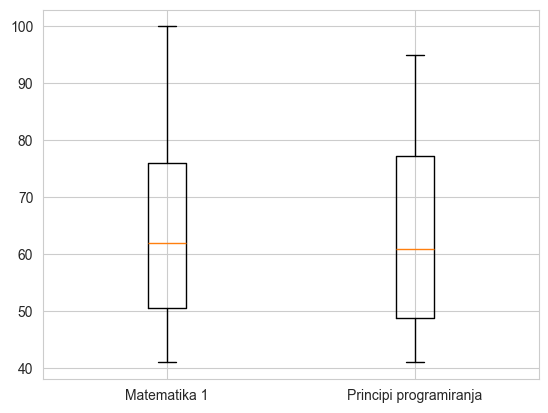

In [7]:
# Proveravamo outlier-e preko box plot-a
plt.boxplot(cluster_data[["Matematika 1", "Principi programiranja"]], tick_labels=["Matematika 1", "Principi programiranja"])
plt.show()
# Nema outlier-a (tačke iznad ili ispod na box-plot-u)

In [8]:
# Proveravamo da li postoji korelacija između ove dve promenljive
# Nekakva korelacija postoji, ali nije prevelika (0.56) pa ne izbacujemo ništa
cluster_data[["Matematika 1", "Principi programiranja"]].corr()

,Matematika 1,Principi programiranja
Matematika 1,1.000000,0.560813
Principi programiranja,0.560813,1.000000


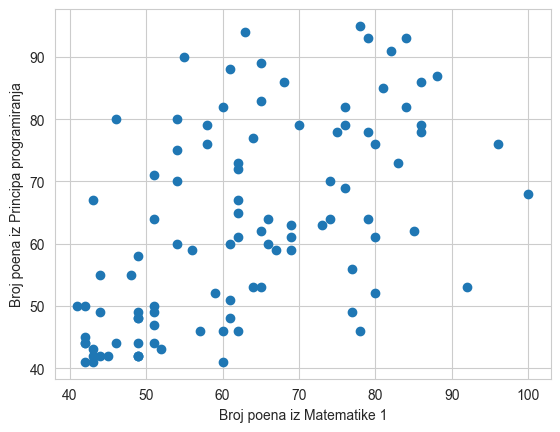

In [9]:
#Pošto su samo dve promenljive, možemo da nacrtamo scatterplot da vidimo raspodelu
#Konkretno, da vidimo da li se uočavaju klasteri golim okom
plt.scatter(cluster_data["Matematika 1"], cluster_data["Principi programiranja"])
plt.xlabel("Broj poena iz Matematike 1")
plt.ylabel("Broj poena iz Principa programiranja")

plt.show()

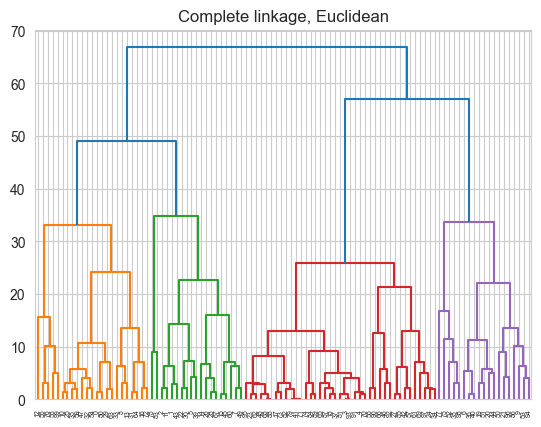

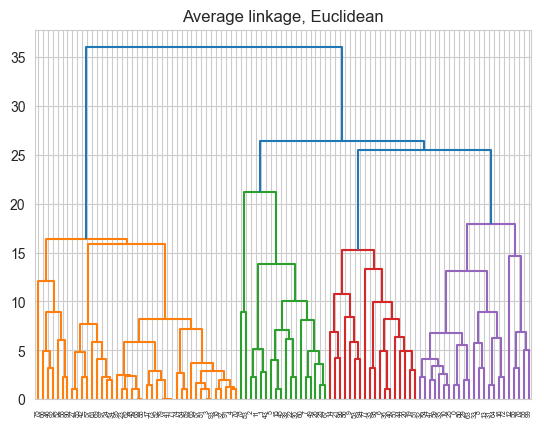

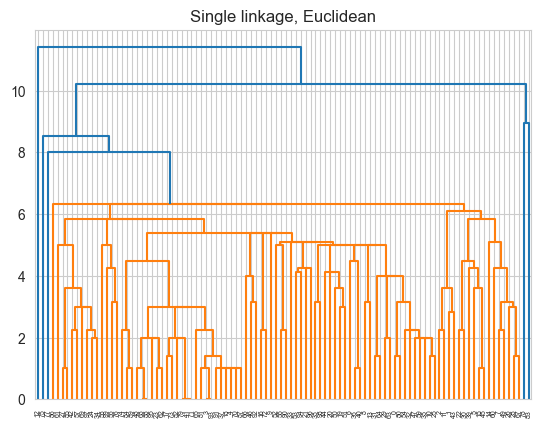

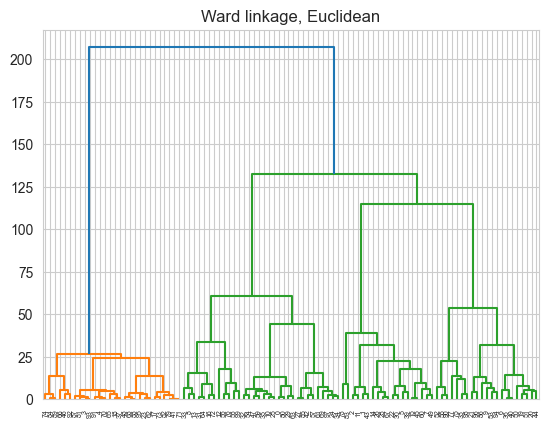

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Metoda linkage vraća podatke o razdaljinama između instanci,
# paramteri su metoda ("complete" tj. max, "average", "single" i "ward") i
# metric ("euclidean" ili "cityblock" tj. Menhetn)
complete_clustering = linkage(cluster_data, method="complete", metric="euclidean")
average_clustering = linkage(cluster_data, method="average", metric="euclidean")
single_clustering = linkage(cluster_data, method="single", metric="euclidean")
ward_clustering = linkage(cluster_data, method="ward", metric="euclidean")

#Metoda dendrogram dobija ove razdaljine kao parametar i iscrtava dendrogam
dendrogram(complete_clustering)
plt.title("Complete linkage, Euclidean")
plt.show()

dendrogram(average_clustering)
plt.title("Average linkage, Euclidean")
plt.show()

dendrogram(single_clustering)
plt.title("Single linkage, Euclidean")
plt.show()

dendrogram(ward_clustering)
plt.title("Ward linkage, Euclidean") #Ward linkage kriterijum - minimizacija WCSS (within clusters sum of squares greške)nakon spajanja
plt.show()

# Tumačenje dendrograma da bi se odredio optimalan broj klastera
# Boje na dendrogramu i visina vertikalnih linija

# Za complete linkage važi da je optimalno 4 klastera, koji se čine da su slične veličine
# Za average linkage slično kao prethodno
# Za single linkage su optimalna dva klastera od kojih je jedan jako veliki a drugi jako mali
# Za Ward linkage slično kao prethodno

# Zaključak: optimalno je dva ili četiri klastera
# Kada budemo probali sa dva, koristićemo Ward linkage jer su klasteri razmaknutiji i imaju manje razlike u smislu veličine
# Kada budemo probali sa četiri, koristićemo complete linkage jer dobijamo razmaknutije klastere slične veličine

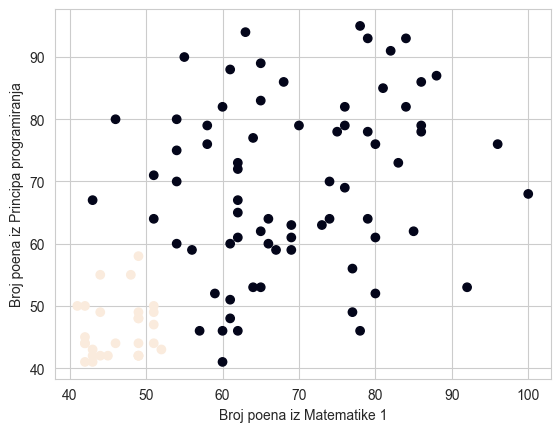

Veličina klastera 1: 72
Veličina klastera 2: 28


In [11]:
# Probamo sa dva klastera, Ward linkage
# metoda fit() izvršava klasterizaciju
h_clustering = cluster.AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward').fit(cluster_data)

# Opet scatter plot sa bojama koje označavaju koji student pripada kojem klasteru
# Promenljiva labels_ sadrži niz sa brojavima kojem klasteru pripada koja instanca
plt.scatter(cluster_data["Matematika 1"], cluster_data["Principi programiranja"], c=h_clustering.labels_)
plt.xlabel("Broj poena iz Matematike 1")
plt.ylabel("Broj poena iz Principa programiranja")
plt.show()

# Novi Data frame sa podacima i dodatom kolonom sa oznakama klastera
two_clusters = cluster_data.copy()
two_clusters["cluster"] = h_clustering.labels_

# Subjektivna procena: previše su opšti klasteri, izdvojila se grupa studenata kojima
#ide loše i matematika i programiranje, i grupa koju čine svi ostali.
# Objektivna procena:
# 1. Klasteri imaju značajnu veličinu ali se prilično razlikuju u tom smislu (72, 28)
print("Veličina klastera 1:", two_clusters.loc[two_clusters["cluster"] == 0, "cluster"].count())
print("Veličina klastera 2:", two_clusters.loc[two_clusters["cluster"] == 1, "cluster"].count())

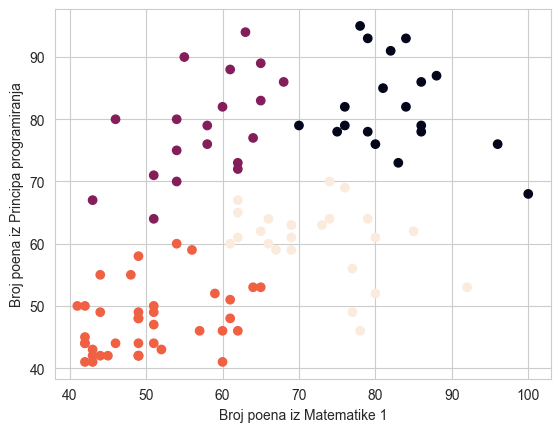

Veličina klastera 1: 19
Veličina klastera 2: 19
Veličina klastera 3: 39
Veličina klastera 4: 23


In [12]:
# Probamo sa četiri klastera, complete linkage
# metoda fit() izvršava klasterizaciju
h_clustering = cluster.AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete').fit(cluster_data)

# Opet scatter plot sa bojama koje označavaju koji student pripada kojem klasteru
plt.scatter(cluster_data["Matematika 1"], cluster_data["Principi programiranja"], c=h_clustering.labels_)
plt.xlabel("Broj poena iz Matematike 1")
plt.ylabel("Broj poena iz Principa programiranja")
plt.show()

# Novi data frame sa podacima i kolonom sa oznakama klastera
four_clusters = cluster_data
four_clusters["cluster"] = h_clustering.labels_

# Subjektivna procena: Možda najsmislenije
# 1. Studenti kojima ne ide nijedno
# 2. Studenti kojima idu oba odlično
# 3. Studenti kojima ide matematika, ali im ne ide programiranje
# 4. Studenti kojima odlično ide programiranje ali im ne ide matematika
# Objektivna procena:
# 1. Klasteri imaju značajnu veličinu (19, 23, 19, 39)
print("Veličina klastera 1:", four_clusters.loc[cluster_data["cluster"] == 0, "cluster"].count())
print("Veličina klastera 2:", four_clusters.loc[cluster_data["cluster"] == 1, "cluster"].count())
print("Veličina klastera 3:", four_clusters.loc[cluster_data["cluster"] == 2, "cluster"].count())
print("Veličina klastera 4:", four_clusters.loc[cluster_data["cluster"] == 3, "cluster"].count())


In [13]:
# Napravimo nova 4 data frame-a gde odvojimo podatke za svaki klaster
cluster1 = four_clusters.loc[four_clusters["cluster"] == 0, ["Matematika 1", "Principi programiranja"]]
cluster2 = four_clusters.loc[four_clusters["cluster"] == 1, ["Matematika 1", "Principi programiranja"]]
cluster3 = four_clusters.loc[four_clusters["cluster"] == 2, ["Matematika 1", "Principi programiranja"]]
cluster4 = four_clusters.loc[four_clusters["cluster"] == 3, ["Matematika 1", "Principi programiranja"]]

four_clusters

,Matematika 1,Principi programiranja,cluster
0,61,60,3
1,84,93,0
2,79,93,0
3,42,44,2
4,43,41,2
...,...,...,...
95,51,47,2
96,68,86,1
97,61,48,2
98,54,70,1


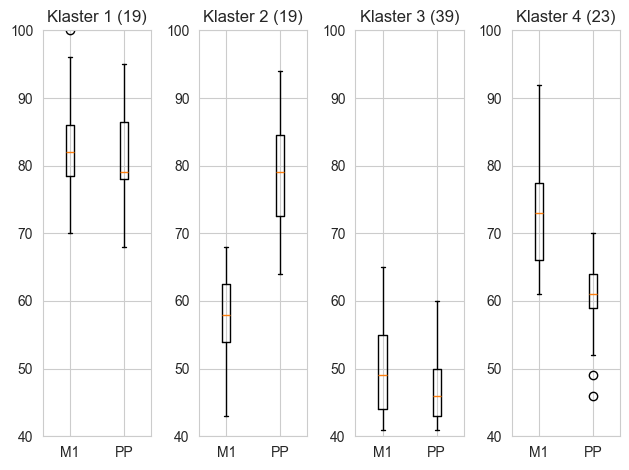

In [15]:
# Pravimo 4 boxplot-a na kojima vidimo ta četiri klastera i raspodele poena unutra njih
fig, ax = plt.subplots(1,4)

ax[0].boxplot(cluster1, tick_labels=("M1", "PP"))
ax[0].set_ylim(40, 100)
ax[0].set_title("Klaster 1 (19)")

ax[1].boxplot(cluster2, tick_labels=("M1", "PP"))
ax[1].set_ylim(40, 100)
ax[1].set_title("Klaster 2 (19)")

ax[2].boxplot(cluster3, tick_labels=("M1", "PP"))
ax[2].set_ylim(40, 100)
ax[2].set_title("Klaster 3 (39)")

ax[3].boxplot(cluster4, tick_labels=("M1", "PP"))
ax[3].set_ylim(40, 100)
ax[3].set_title("Klaster 4 (23)")


plt.tight_layout()
plt.show()

In [ ]:
# Tumačenje klastera

# 1. Veličina klastera
# Veličine klastera su 19, 19, 39 i 23 respektivno, tako da svaki klaster ima značajnu veličinu,
# sa tim da je klaster 3 (studenti kojima ništa ne ide) najveći.

# 2. Centri klastera
# Klaster 1 čine studenti kojima idu oba odlično
# Klaster 2 čine studenti kojima odlično ide programiranje ali im slabo ide matematika
# Klaster 3 čine studenti kojima ne ide nijedno (ili su odustali od studija)
# Klaster 4 čine studenti kojima ok ide matematika, ali im slabije ide programiranje

# 3. Disperzija od centara
# Klaster 4 je najmanje homogen (najveća disperzija) po atributu Matematika 1 dok su ostali
# klasteri više homogeni. Disperzija po atributu Principi programiranja je najveća za klaster 2,
# a najmanja za klastere 3 i 4.
# Uopšteno gledano, čini se da je najhomogeniji klaster 3 kojeg čine studenti kojima ne ide
# ni matematika ni programiranje.

In [19]:
import numpy as np
from scipy.spatial.distance import cdist

# A sada, kojem klasteru bi pripao student koji ima 50 poena iz matematike i 100 iz programiranja?
novi_student = pd.DataFrame({'Matematika 1': [50],
        'Principi programiranja': [100]})

# Utvrđujemo rastojanja do svih instanci iz skupa podataka metodom cdistance (compute distance)
distances = cdist(novi_student, cluster_data[["Matematika 1", "Principi programiranja"]], metric='euclidean')

#Pronalazimo najbližu instancu iz skupa podataka vraćanjem indeksa elementa niza rastojanja koji ima najmanju vrednost
closest_idx = np.argmin(distances)

# Novoj instanci (novom studentu) dodeljujemo isti klaster kao njemu najbližoj instanci
predicted_cluster = h_clustering.labels_[closest_idx]+1

print(f"Nov student najviše pripada klasteru :  {predicted_cluster}")

Nov student najviše pripada klasteru :  2
